In [ ]:
from time import time

import matplotlib.pyplot as plt

from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
lfw= fetch_lfw_people()

In [ ]:
lfw

{'data': array([[0.17124183, 0.14901961, 0.12287582, ..., 0.09673203, 0.09934641,
         0.09411765],
        [0.61960787, 0.6287582 , 0.67058825, ..., 0.54640526, 0.53464055,
         0.5071896 ],
        [0.31111112, 0.3254902 , 0.34509805, ..., 0.7568628 , 0.579085  ,
         0.24575163],
        ...,
        [0.14509805, 0.15555556, 0.21176471, ..., 0.2627451 , 0.2522876 ,
         0.21045752],
        [0.07058824, 0.09150327, 0.23660131, ..., 0.875817  , 0.5673203 ,
         0.2509804 ],
        [0.23006536, 0.2       , 0.06535948, ..., 0.45620918, 0.4       ,
         0.5895425 ]], dtype=float32),
 'images': array([[[0.17124183, 0.14901961, 0.12287582, ..., 0.1124183 ,
          0.13986929, 0.15947713],
         [0.18692811, 0.16470589, 0.12810458, ..., 0.12156863,
          0.14248367, 0.1633987 ],
         [0.16732027, 0.15686275, 0.19607843, ..., 0.12810458,
          0.14771242, 0.18300654],
         ...,
         [0.703268  , 0.3882353 , 0.17908497, ..., 0.07712419,
     

In [ ]:
lfw

{'data': array([[0.17124183, 0.14901961, 0.12287582, ..., 0.09673203, 0.09934641,
         0.09411765],
        [0.61960787, 0.6287582 , 0.67058825, ..., 0.54640526, 0.53464055,
         0.5071896 ],
        [0.31111112, 0.3254902 , 0.34509805, ..., 0.7568628 , 0.579085  ,
         0.24575163],
        ...,
        [0.14509805, 0.15555556, 0.21176471, ..., 0.2627451 , 0.2522876 ,
         0.21045752],
        [0.07058824, 0.09150327, 0.23660131, ..., 0.875817  , 0.5673203 ,
         0.2509804 ],
        [0.23006536, 0.2       , 0.06535948, ..., 0.45620918, 0.4       ,
         0.5895425 ]], dtype=float32),
 'images': array([[[0.17124183, 0.14901961, 0.12287582, ..., 0.1124183 ,
          0.13986929, 0.15947713],
         [0.18692811, 0.16470589, 0.12810458, ..., 0.12156863,
          0.14248367, 0.1633987 ],
         [0.16732027, 0.15686275, 0.19607843, ..., 0.12810458,
          0.14771242, 0.18300654],
         ...,
         [0.703268  , 0.3882353 , 0.17908497, ..., 0.07712419,
     

In [ ]:
print(lfw.data.shape)
print(lfw.target.shape)

(13233, 2914)
(13233,)


In [ ]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

n_samples, h, w = lfw_people.images.shape

X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
n_components = 150

print(
    "Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0])
)
t0 = time()
pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))

Extracting the top 150 eigenfaces from 966 faces
done in 0.432s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.030s


In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
clf1=LogisticRegression(multi_class= 'ovr')

In [ ]:
 clf1.fit(X_train_pca, y_train)

LogisticRegression(multi_class='ovr')

In [ ]:
clf1.score(X_train_pca,y_train)

0.9865424430641822

In [ ]:
log_pred = clf1.predict(X_test_pca)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,log_pred)

0.8167701863354038

Predicting people's names on the test set
done in 0.009s
                   precision    recall  f1-score   support

     Ariel Sharon       0.78      0.54      0.64        13
     Colin Powell       0.79      0.88      0.83        60
  Donald Rumsfeld       0.71      0.74      0.73        27
    George W Bush       0.89      0.90      0.89       146
Gerhard Schroeder       0.64      0.72      0.68        25
      Hugo Chavez       0.64      0.47      0.54        15
       Tony Blair       0.84      0.75      0.79        36

         accuracy                           0.82       322
        macro avg       0.76      0.71      0.73       322
     weighted avg       0.82      0.82      0.81       322



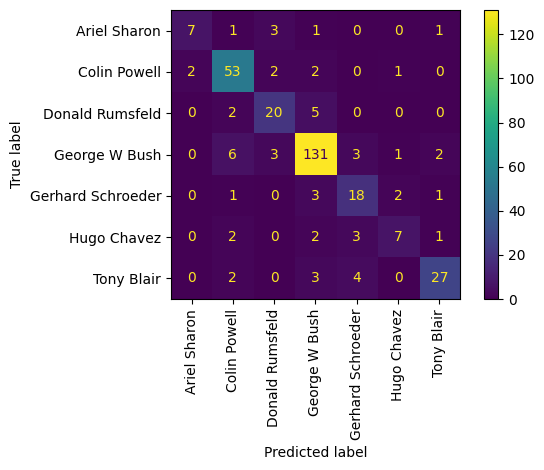

In [ ]:
print("Predicting people's names on the test set")
t0 = time()
y_pred = clf1.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
ConfusionMatrixDisplay.from_estimator(
    clf1, X_test_pca, y_test, display_labels=target_names, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model1=RandomForestClassifier()

In [ ]:
 model1.fit(X_train_pca, y_train)

RandomForestClassifier()

In [ ]:
model1.score(X_train_pca,y_train)

1.0

In [ ]:
log_pred = model1.predict(X_test_pca)

In [ ]:
accuracy_score(y_test,log_pred)

0.6149068322981367

Predicting people's names on the test set
done in 0.056s
                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.08      0.14        13
     Colin Powell       0.69      0.62      0.65        60
  Donald Rumsfeld       1.00      0.30      0.46        27
    George W Bush       0.58      0.97      0.72       146
Gerhard Schroeder       0.00      0.00      0.00        25
      Hugo Chavez       0.00      0.00      0.00        15
       Tony Blair       0.92      0.31      0.46        36

         accuracy                           0.61       322
        macro avg       0.60      0.32      0.35       322
     weighted avg       0.62      0.61      0.54       322



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


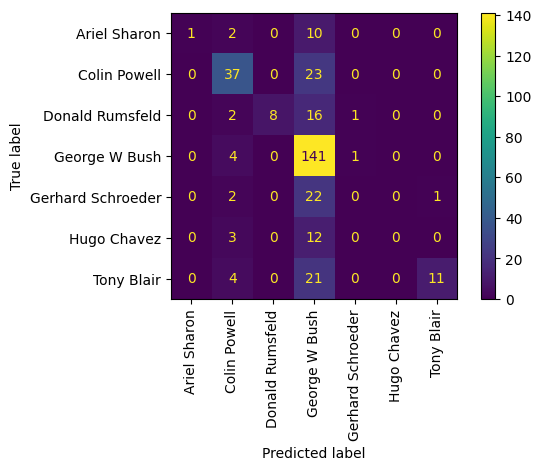

In [ ]:
print("Predicting people's names on the test set")
t0 = time()
y_pred = model1.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
ConfusionMatrixDisplay.from_estimator(
    model1, X_test_pca, y_test, display_labels=target_names, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model2=DecisionTreeClassifier()

In [ ]:
model2.fit(X_train_pca, y_train)

DecisionTreeClassifier()

In [ ]:
model2.score(X_train_pca,y_train)

1.0

In [ ]:
log_pred = model2.predict(X_test_pca)

In [ ]:
accuracy_score(y_test,log_pred)

0.5

Predicting people's names on the test set
done in 0.001s
                   precision    recall  f1-score   support

     Ariel Sharon       0.00      0.00      0.00        13
     Colin Powell       0.55      0.57      0.56        60
  Donald Rumsfeld       0.29      0.37      0.33        27
    George W Bush       0.70      0.62      0.66       146
Gerhard Schroeder       0.35      0.36      0.35        25
      Hugo Chavez       0.27      0.27      0.27        15
       Tony Blair       0.33      0.36      0.34        36

         accuracy                           0.50       322
        macro avg       0.35      0.36      0.36       322
     weighted avg       0.52      0.50      0.51       322



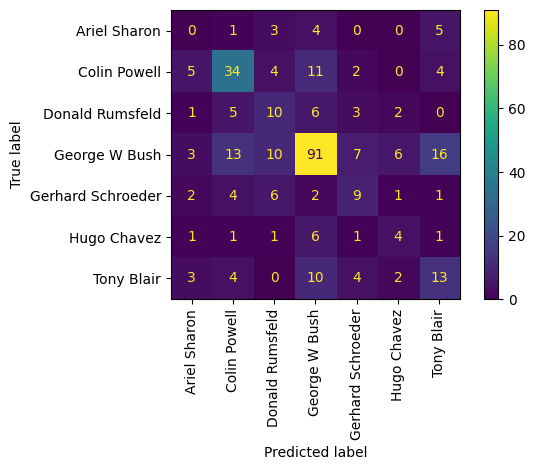

In [ ]:
print("Predicting people's names on the test set")
t0 = time()
y_pred = model2.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
ConfusionMatrixDisplay.from_estimator(
    model2, X_test_pca, y_test, display_labels=target_names, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()